In [1]:
import sklearn
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'D:\\learnings\\Internship\\assignment_questions\\ML\\ML_-Datasets-main\\ML_-Datasets-main\\Global Power Plant Database'

In [118]:
df = pd.concat([pd.read_csv(x) for x in os.listdir() if '.csv' in x])

In [119]:
df.head(20)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AUS,Australia,Angaston,AUS0000232,50.00,-34.5034,139.0246,Oil,NaN,NaN,...,2019.0,NaN,NaN,1.653056,5.300833,7.649722,2.222222,NaN,Australia Clean Energy Regulator,NaN
6,AUS,Australia,Anglesea,AUS0000114,165.00,-38.3861,144.1828,Coal,NaN,NaN,...,2019.0,1095.676944,1239.962778,1260.261111,167.880000,NaN,NaN,NaN,Australia Clean Energy Regulator,NaN
7,AUS,Australia,Angurugu,AUS0000615,3.60,-13.8584,136.4209,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AUS,Australia,Appin (Mine),AUS0000264,55.60,-34.2082,150.7722,Gas,NaN,NaN,...,2019.0,204.804444,238.294444,163.583611,158.933056,64.534722,99.470000,NaN,Australia Clean Energy Regulator,NaN
9,AUS,Australia,Ararat Wind Farm,AUS0000611,240.00,-37.2385,143.0794,Wind,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This have two problem statements. target1 is categorical problem, target2 is a continuous variables. so classification and regression respectively

In [120]:
target1 = 'primary_fuel'
target2 = 'capacity_mw'

In [121]:
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url        

# Exploratory Data Analysis

In [123]:
dfc = df.copy()

Dropping unwanted columns like all nan, other fuel types as they are not relevant and also have more null values which can't be filled with general methods and might lead to bad results

In [124]:
df.drop(columns =['wepp_id','other_fuel1','other_fuel2','other_fuel3','estimated_generation_gwh','country','country_long','year_of_capacity_data'],inplace=True,axis=1)

In [125]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source'],
      dtype='object')

In [126]:
dfc.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [127]:
gen_cols = [col for col in df.columns if 'generation_gwh_201' in col]

In [128]:
num_cols = df.describe().columns.to_list()
cat_cols = [col for col in df.columns if col not in num_cols]

In [129]:
df[num_cols].skew()

capacity_mw            5.473446
latitude              -1.858538
longitude              2.324400
commissioning_year    -1.671173
generation_gwh_2013    6.218941
generation_gwh_2014    6.039632
generation_gwh_2015    6.347904
generation_gwh_2016    6.678996
generation_gwh_2017    6.974726
generation_gwh_2018    7.130250
dtype: float64

most columns are skewed. need to handle that. Lets first see the correlations

In [130]:
dfcorr = df[num_cols].corr()

<Axes: >

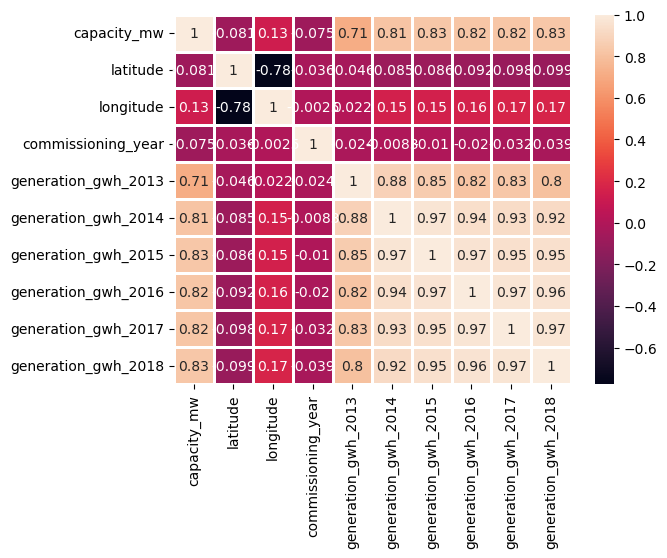

In [131]:
sns.heatmap(dfcorr,annot=True,linewidth=2)

Generation years are positively correlated with capacity_mw. ie, if one increase other increase. Let's check primary fuel type correlation with other variables

In [132]:
df['generation_gwh_2019'].info()

<class 'pandas.core.series.Series'>
Index: 13298 entries, 0 to 11878
Series name: generation_gwh_2019
Non-Null Count  Dtype 
--------------  ----- 
9778 non-null   object
dtypes: object(1)
memory usage: 207.8+ KB


Dropping unwanted columns

In [133]:
df.drop(columns = ['url','owner','generation_data_source','name','gppd_idnr'],inplace=True,axis=1)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          13292 non-null  float64
 1   latitude             13220 non-null  float64
 2   longitude            13220 non-null  float64
 3   primary_fuel         11294 non-null  object 
 4   commissioning_year   10654 non-null  float64
 5   source               13298 non-null  object 
 6   geolocation_source   13275 non-null  object 
 7   generation_gwh_2013  7170 non-null   float64
 8   generation_gwh_2014  7534 non-null   float64
 9   generation_gwh_2015  7993 non-null   float64
 10  generation_gwh_2016  8701 non-null   float64
 11  generation_gwh_2017  9292 non-null   float64
 12  generation_gwh_2018  9858 non-null   float64
 13  generation_gwh_2019  9778 non-null   object 
dtypes: float64(10), object(4)
memory usage: 1.5+ MB


In [135]:
df['generation_gwh_2019'].unique()

array([nan, 'Central Electricity Authority', 2.467, ..., 1.211, 1.589,
       72.06506], dtype=object)

in the above column somehow data is mentioned wrongly. Need to delete that.

In [136]:
df['generation_gwh_2019'] = df['generation_gwh_2019'].apply(lambda x : np.nan if isinstance(x, str) else x)

In [137]:
dfc['generation_gwh_2019'] = dfc['generation_gwh_2019'].apply(lambda x : np.nan if isinstance(x, str) else x)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          13292 non-null  float64
 1   latitude             13220 non-null  float64
 2   longitude            13220 non-null  float64
 3   primary_fuel         11294 non-null  object 
 4   commissioning_year   10654 non-null  float64
 5   source               13298 non-null  object 
 6   geolocation_source   13275 non-null  object 
 7   generation_gwh_2013  7170 non-null   float64
 8   generation_gwh_2014  7534 non-null   float64
 9   generation_gwh_2015  7993 non-null   float64
 10  generation_gwh_2016  8701 non-null   float64
 11  generation_gwh_2017  9292 non-null   float64
 12  generation_gwh_2018  9858 non-null   float64
 13  generation_gwh_2019  9777 non-null   float64
dtypes: float64(11), object(3)
memory usage: 1.5+ MB


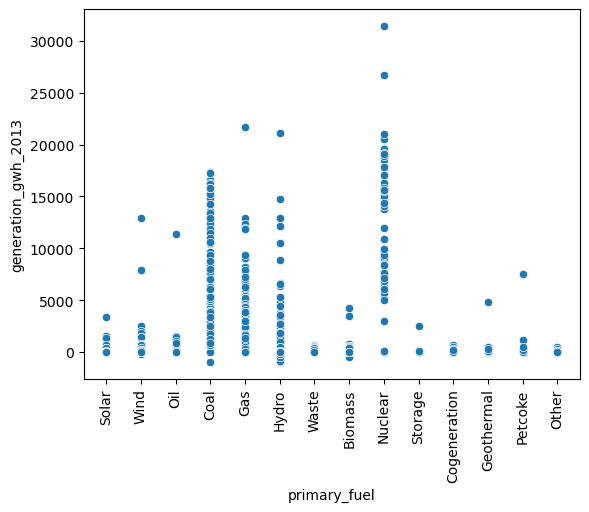

In [139]:
sns.scatterplot(x='primary_fuel',y='generation_gwh_2013',data=df)
plt.xticks(rotation=90)
plt.show()

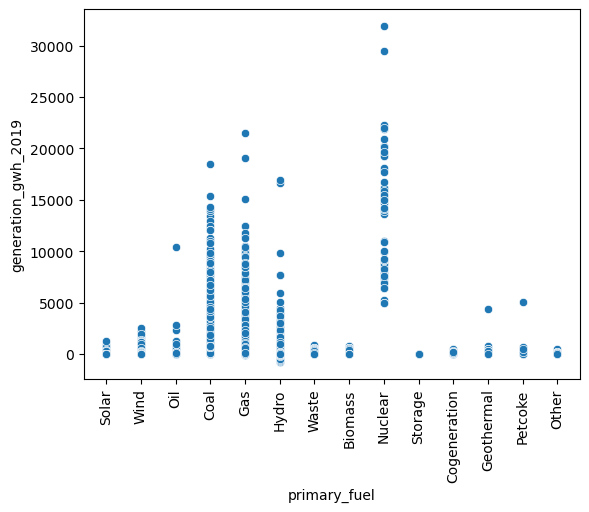

In [140]:

sns.scatterplot(x='primary_fuel',y='generation_gwh_2019',data=df)
plt.xticks(rotation=90)
plt.show()

We are encoding lables so that we can have our model build

In [141]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
num_cols = df.describe().columns.to_list()
cat_cols = [col for col in df.columns if col not in num_cols]

for col in cat_cols:
    df[col] = lab.fit_transform(df[col])


In [142]:
ccat_cols = [col for col in dfc.columns if col not in num_cols]
for col in ccat_cols:
    dfc[col] = lab.fit_transform(dfc[col])

In [143]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  int32  
 1   country_long              13298 non-null  int32  
 2   name                      13298 non-null  int32  
 3   gppd_idnr                 13298 non-null  int32  
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              13298 non-null  int32  
 8   other_fuel1               13298 non-null  int32  
 9   other_fuel2               13298 non-null  int32  
 10  other_fuel3               13298 non-null  int32  
 11  commissioning_year        10654 non-null  float64
 12  owner                     13298 non-null  int32  
 13  source                    13298 non-null  int32  
 14  url        

In [144]:
dfc.corr()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
country,1.000000,1.000000,-0.016444,0.310570,-0.096442,0.870533,-0.937091,0.181917,-0.022187,-0.042332,...,-0.312295,-0.008335,-0.108497,-0.112485,-0.122711,-0.134595,-0.138444,NaN,0.320224,NaN
country_long,1.000000,1.000000,-0.016444,0.310570,-0.096442,0.870533,-0.937091,0.181917,-0.022187,-0.042332,...,-0.312295,-0.008335,-0.108497,-0.112485,-0.122711,-0.134595,-0.138444,NaN,0.320224,NaN
name,-0.016444,-0.016444,1.000000,-0.003858,-0.003661,-0.017648,0.010571,0.010583,0.000348,0.002209,...,-0.003296,-0.008819,0.002474,0.002470,0.002095,0.006213,0.008050,-0.007492,0.005971,NaN
gppd_idnr,0.310570,0.310570,-0.003858,1.000000,-0.276226,0.277990,-0.241120,0.483915,0.271044,0.090571,...,0.303574,-0.109877,-0.188676,-0.193674,-0.203136,-0.213737,-0.215471,-0.194369,0.470852,NaN
capacity_mw,-0.096442,-0.096442,-0.003661,-0.276226,1.000000,-0.081193,0.127826,-0.360062,-0.281998,-0.084930,...,-0.034778,0.711180,0.814716,0.827439,0.823751,0.820414,0.826853,0.851870,-0.196198,NaN
latitude,0.870533,0.870533,-0.017648,0.277990,-0.081193,1.000000,-0.775317,0.115896,-0.043744,-0.026677,...,-0.177654,-0.046186,-0.084652,-0.085761,-0.091660,-0.098268,-0.099210,-0.088435,0.300247,NaN
longitude,-0.937091,-0.937091,0.010571,-0.241120,0.127826,-0.775317,1.000000,-0.187080,-0.011504,0.031956,...,0.396508,0.021610,0.148005,0.152223,0.159909,0.171049,0.174741,0.033059,-0.281151,NaN
primary_fuel,0.181917,0.181917,0.010583,0.483915,-0.360062,0.115896,-0.187080,1.000000,0.360611,0.139602,...,-0.032688,-0.169099,-0.216699,-0.230357,-0.233458,-0.236729,-0.245155,-0.228294,0.377580,NaN
other_fuel1,-0.022187,-0.022187,0.000348,0.271044,-0.281998,-0.043744,-0.011504,0.360611,1.000000,0.317891,...,0.066421,-0.064561,-0.128130,-0.138830,-0.140646,-0.148323,-0.148958,-0.109305,0.143848,NaN
other_fuel2,-0.042332,-0.042332,0.002209,0.090571,-0.084930,-0.026677,0.031956,0.139602,0.317891,1.000000,...,0.024771,-0.057573,-0.027293,-0.033489,-0.026416,-0.031297,-0.029014,-0.062154,0.025424,NaN


In [ ]:
dfc.drop(columns=['wepp_id','estimated_generation_gwh'],inplace=True)

In [147]:
df['primary_fuel']

0        10
1        10
2        13
3        10
4         7
         ..
11874    13
11875    10
11876    14
11877    14
11878     3
Name: primary_fuel, Length: 13298, dtype: int32

In [106]:
dfx = df.copy()

Text(0, 0.5, 'Target')

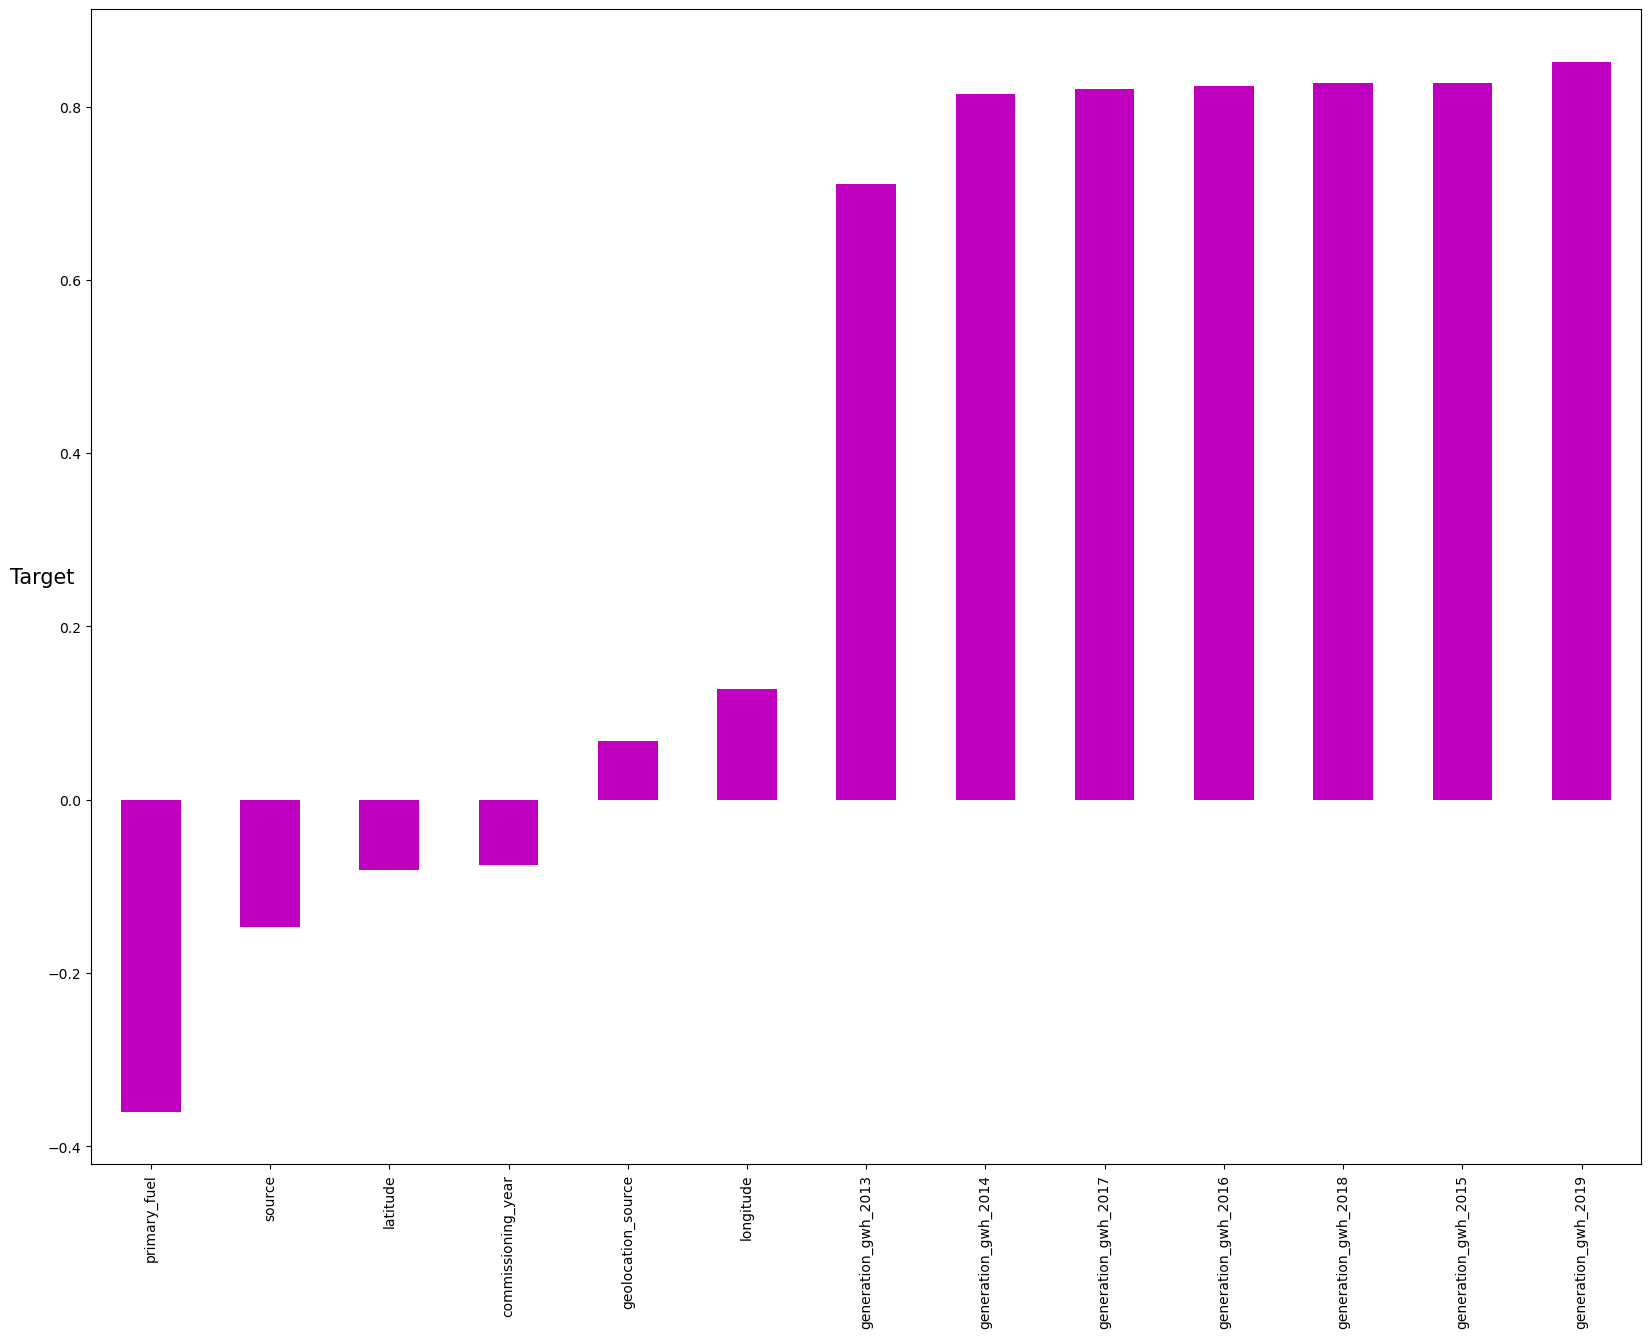

In [107]:
plt.figure(figsize=(20,15))
df.corr()['capacity_mw'].sort_values(ascending=True).drop(['capacity_mw']).plot(kind='bar',color='m')
plt.ylabel('Target',rotation=0,fontsize=15)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          13292 non-null  float64
 1   latitude             13220 non-null  float64
 2   longitude            13220 non-null  float64
 3   primary_fuel         13298 non-null  int32  
 4   commissioning_year   10654 non-null  float64
 5   source               13298 non-null  int32  
 6   geolocation_source   13298 non-null  int32  
 7   generation_gwh_2013  7170 non-null   float64
 8   generation_gwh_2014  7534 non-null   float64
 9   generation_gwh_2015  7993 non-null   float64
 10  generation_gwh_2016  8701 non-null   float64
 11  generation_gwh_2017  9292 non-null   float64
 12  generation_gwh_2018  9858 non-null   float64
 13  generation_gwh_2019  9777 non-null   float64
dtypes: float64(11), int32(3)
memory usage: 1.4 MB


In [109]:
df.skew()

capacity_mw            5.473446
latitude              -1.858538
longitude              2.324400
primary_fuel          -0.251777
commissioning_year    -1.671173
source                -2.699669
geolocation_source    -3.175136
generation_gwh_2013    6.218941
generation_gwh_2014    6.039632
generation_gwh_2015    6.347904
generation_gwh_2016    6.678996
generation_gwh_2017    6.974726
generation_gwh_2018    7.130250
generation_gwh_2019    7.609494
dtype: float64

Lets check outliers

In [110]:
def all_col_histplots(df):
    plt.figure(figsize=(20,100),facecolor='white')
    plotnum = 1

    for col in df.columns:
        if plotnum < 14:
            ax = plt.subplot(14,1,plotnum)
            sns.histplot(df[col])
            plt.xlabel(col)
        plotnum += 1
    plt.tight_layout()


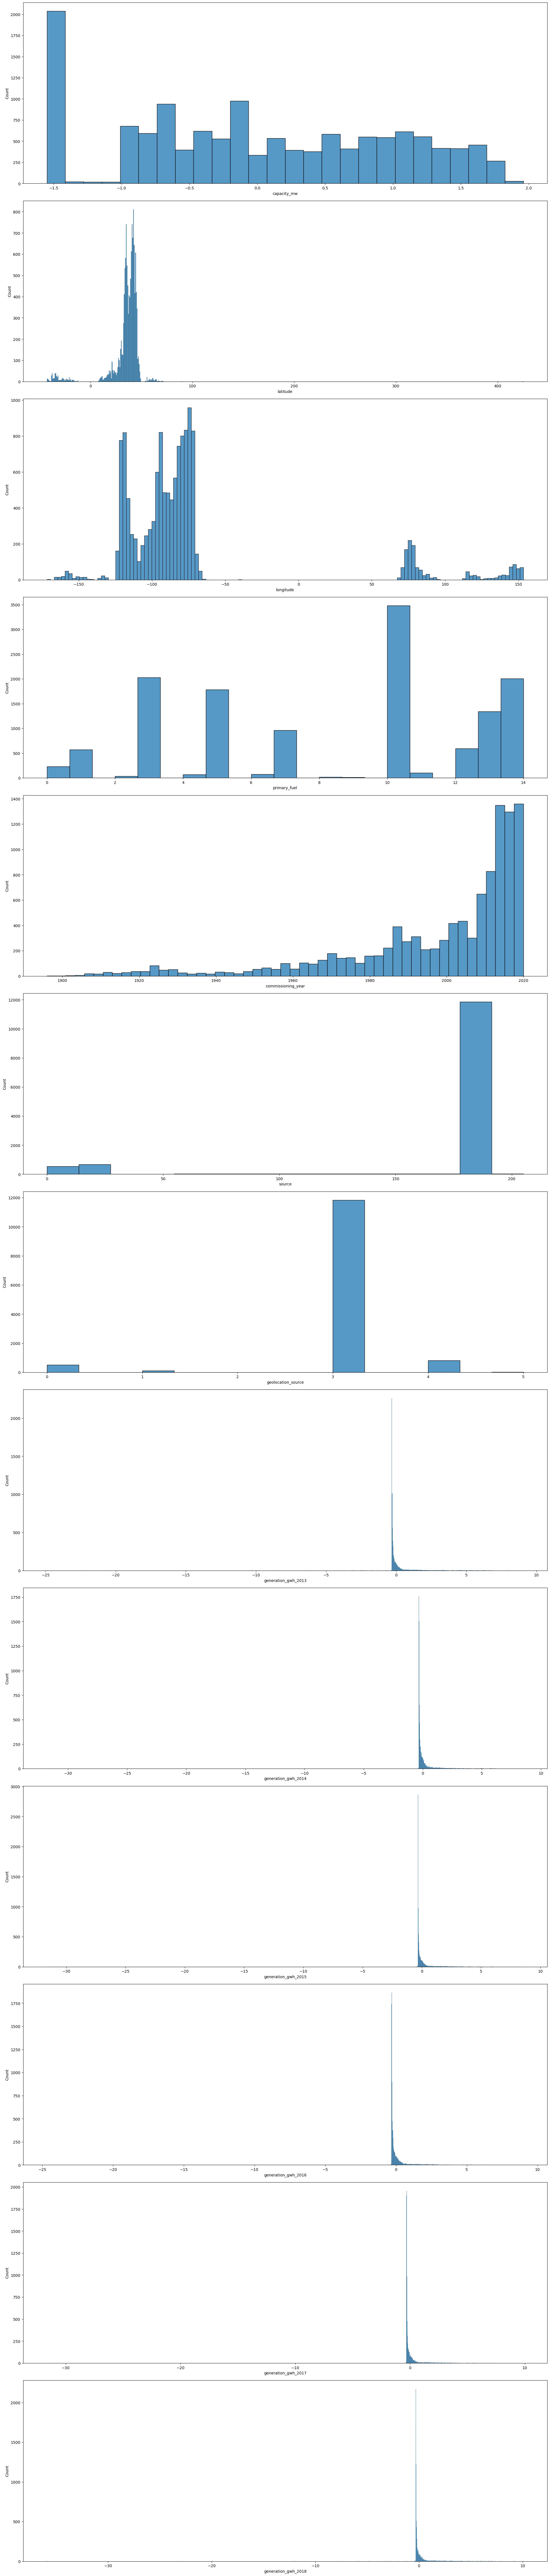

In [72]:
all_col_histplots(df)

we can observe that there is a lot of skewness in the data. We need to remove outliers first. removing outliers for all the columns for better results

In [111]:
df = dfx

In [112]:
len(df)

13298

In [113]:
#Here p is primary fuel indication
Xp = df.drop(columns = ['primary_fuel'])
yp = df['primary_fuel']

In [114]:
df['capacity_mw'].isnull().sum()

6

In [78]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.11,-34.9387,138.5377,10,2011.00000,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.00,-34.9453,138.5882,10,NaN,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.60,-35.0641,117.7977,13,NaN,12,0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN
3,0.24,-23.7966,133.8971,10,2004.00000,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.00,-34.5509,138.7659,7,2015.00000,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,3.40,42.8869,-76.9683,13,2012.00000,185,3,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.21100
11875,1.00,44.3195,-92.6703,10,2018.00000,185,3,NaN,NaN,NaN,NaN,NaN,1.161000,1.58900
11876,0.00,44.0460,-92.7600,14,NaN,185,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11877,0.00,39.7373,-105.0170,14,NaN,185,3,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN


In [148]:
dfc = dfc[~dfc['capacity_mw'].isnull()].reset_index(drop=True)

In [149]:
dfc

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,0,0,192,411,0.11,-34.9387,138.5377,10,12,11,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,0,0,193,410,1.00,-34.9453,138.5882,10,12,11,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,0,0,254,60,21.60,-35.0641,117.7977,13,12,11,...,0,0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,0
3,0,0,280,446,0.24,-23.7966,133.8971,10,12,11,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,0,0,380,223,4.00,-34.5509,138.7659,7,12,11,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13287,2,2,13260,7059,3.40,42.8869,-76.9683,13,12,11,...,3,0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.21100,2
13288,2,2,13261,10616,1.00,44.3195,-92.6703,10,12,11,...,3,0,NaN,NaN,NaN,NaN,NaN,1.161000,1.58900,2
13289,2,2,13262,12370,0.00,44.0460,-92.7600,14,12,11,...,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
13290,2,2,13263,1352,0.00,39.7373,-105.0170,14,12,11,...,3,0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,2


In [150]:
#Here c is capacity indication. We should remove all null variables in target
Xc = dfc.drop(columns = ['capacity_mw'])
yc = dfc['capacity_mw']

We need to scale the data to get into a standard trainable values

In [34]:

from sklearn.preprocessing import StandardScaler, PowerTransformer

scaler = StandardScaler()
Xp = pd.DataFrame(scaler.fit_transform(Xp),columns=Xp.columns)
print(Xp.skew())

capacity_mw            5.473446
latitude              -1.858538
longitude              2.324400
commissioning_year    -1.671173
source                -2.699669
geolocation_source    -3.175136
generation_gwh_2013    6.218941
generation_gwh_2014    6.039632
generation_gwh_2015    6.347904
generation_gwh_2016    6.678996
generation_gwh_2017    6.974726
generation_gwh_2018    7.130250
generation_gwh_2019    7.609494
dtype: float64


Here we need to fill the null values before training. Hence using KNNimputer so that we can fill the null values with nearest values

In [151]:

from sklearn.preprocessing import StandardScaler, PowerTransformer

scaler = StandardScaler()
Xc = pd.DataFrame(scaler.fit_transform(Xc),columns=Xc.columns)
print(Xc.skew())

country                   -3.175640
country_long              -3.175640
name                       0.000095
gppd_idnr                 -0.000311
latitude                  -1.850053
longitude                  2.328446
primary_fuel              -0.251064
other_fuel1               -2.573946
other_fuel2               -7.849940
other_fuel3              -13.249971
commissioning_year        -1.670606
owner                      0.046134
source                    -2.707332
url                        4.103924
geolocation_source        -3.183590
year_of_capacity_data      5.233287
generation_gwh_2013        6.218492
generation_gwh_2014        6.039217
generation_gwh_2015        6.347498
generation_gwh_2016        6.678605
generation_gwh_2017        6.974345
generation_gwh_2018        7.129883
generation_gwh_2019        7.609494
generation_data_source    -0.794148
dtype: float64


In [35]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
Xp_filled = pd.DataFrame(imputer.fit_transform(Xp),columns=Xp.columns)

In [152]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
Xc_filled = pd.DataFrame(imputer.fit_transform(Xc),columns=Xc.columns)

In [ ]:
Xp_filled.skew()

In [154]:
Xc_filled.skew()

country                   -3.175640
country_long              -3.175640
name                       0.000095
gppd_idnr                 -0.000311
latitude                  -1.837874
longitude                  2.286572
primary_fuel              -0.251064
other_fuel1               -2.573946
other_fuel2               -7.849940
other_fuel3              -13.249971
commissioning_year        -1.851490
owner                      0.046134
source                    -2.707332
url                        4.103924
geolocation_source        -3.183590
year_of_capacity_data      5.233287
generation_gwh_2013        7.858397
generation_gwh_2014        7.590611
generation_gwh_2015        7.916077
generation_gwh_2016        8.027176
generation_gwh_2017        8.148307
generation_gwh_2018        7.860844
generation_gwh_2019        7.453674
generation_data_source    -0.794148
dtype: float64

To remove skewness, we need to use boxcox which is good at normalizing data. Since it accepts only positive values, we are addinc constant

In [1]:
from scipy import stats

for col in Xp.columns:
    print(col)
    if np.min(df[col]) < 0:
        Xp_filled[col] = Xp_filled[col] - np.min(Xp_filled[col]) + 1
    Xp_filled[col], _ = stats.boxcox(Xp_filled[col])

NameError: name 'Xp' is not defined

In [156]:
for col in Xp.columns:
    print(col)
    if np.min(df[col]) < 0:
        Xc_filled[col] = Xc_filled[col] - np.min(Xc_filled[col]) + 1
        Xc_filled[col], _ = stats.boxcox(Xc_filled[col])

capacity_mw
latitude
longitude
commissioning_year
source
geolocation_source
generation_gwh_2013
generation_gwh_2014
generation_gwh_2015
generation_gwh_2016
generation_gwh_2017
generation_gwh_2018
generation_gwh_2019


In [157]:
Xp_filled.skew()

NameError: name 'Xp_filled' is not defined

In [158]:
Xc_filled.skew()

country                   -3.175640
country_long              -3.175640
name                       0.000095
gppd_idnr                 -0.000311
latitude                   6.934614
longitude                 -0.225329
primary_fuel              -0.251064
other_fuel1               -2.573946
other_fuel2               -7.849940
other_fuel3              -13.249971
commissioning_year        -1.851490
owner                      0.046134
source                    -2.707332
url                        4.103924
geolocation_source        -3.183590
year_of_capacity_data      5.233287
generation_gwh_2013       -1.572407
generation_gwh_2014       -0.466597
generation_gwh_2015        0.102709
generation_gwh_2016        0.072383
generation_gwh_2017       -0.359118
generation_gwh_2018       -0.554179
generation_gwh_2019       -0.095205
generation_data_source    -0.794148
dtype: float64

Now we can see that the data is a lot better

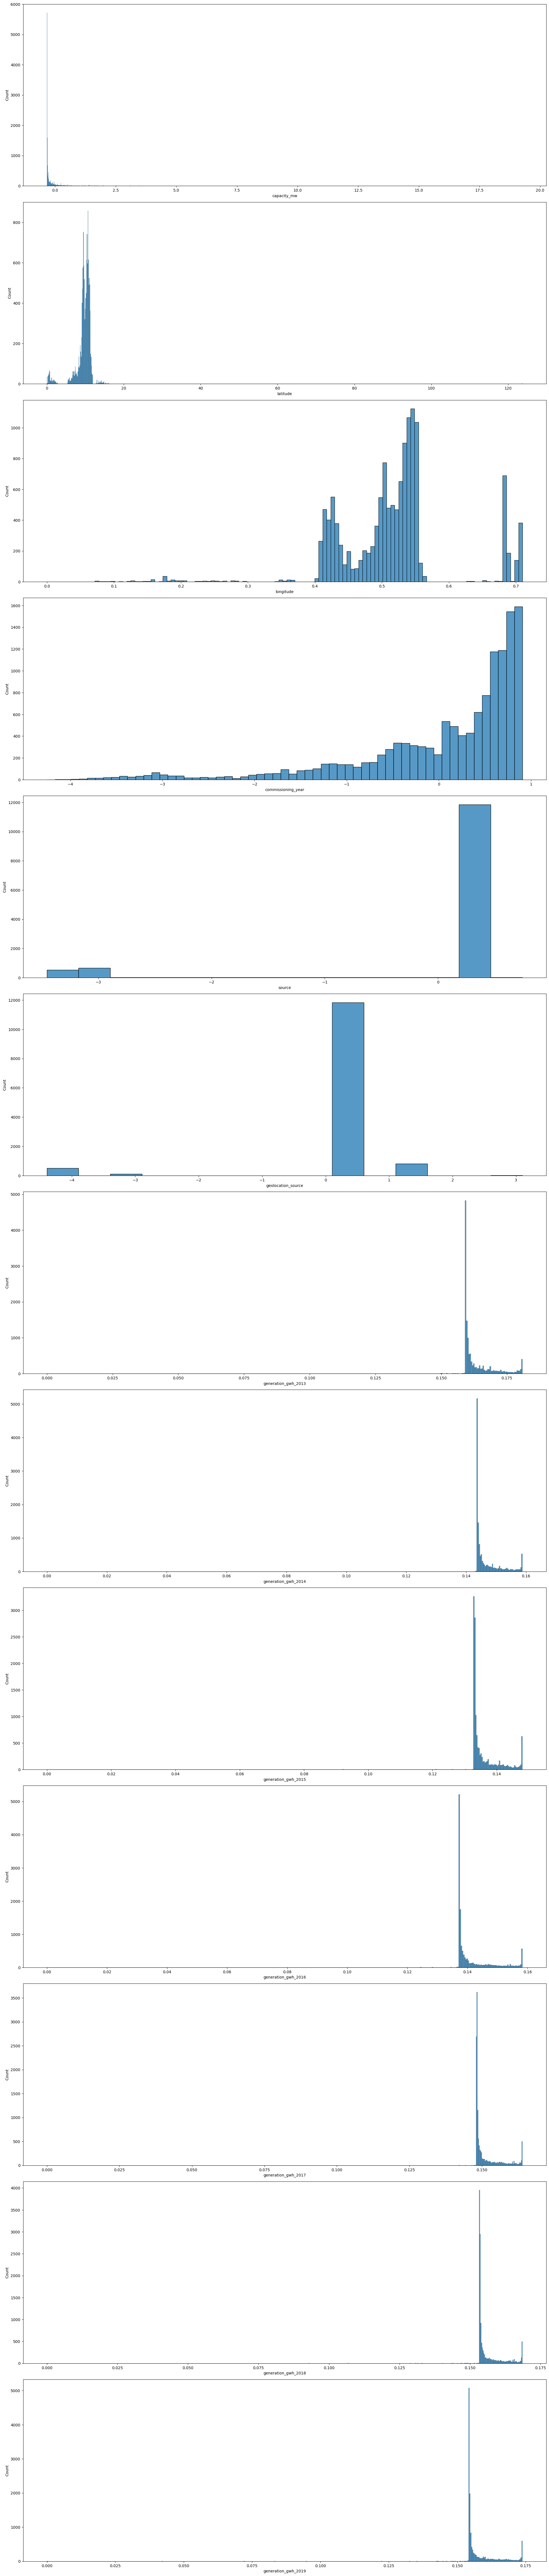

In [66]:
all_col_histplots(Xp_filled)

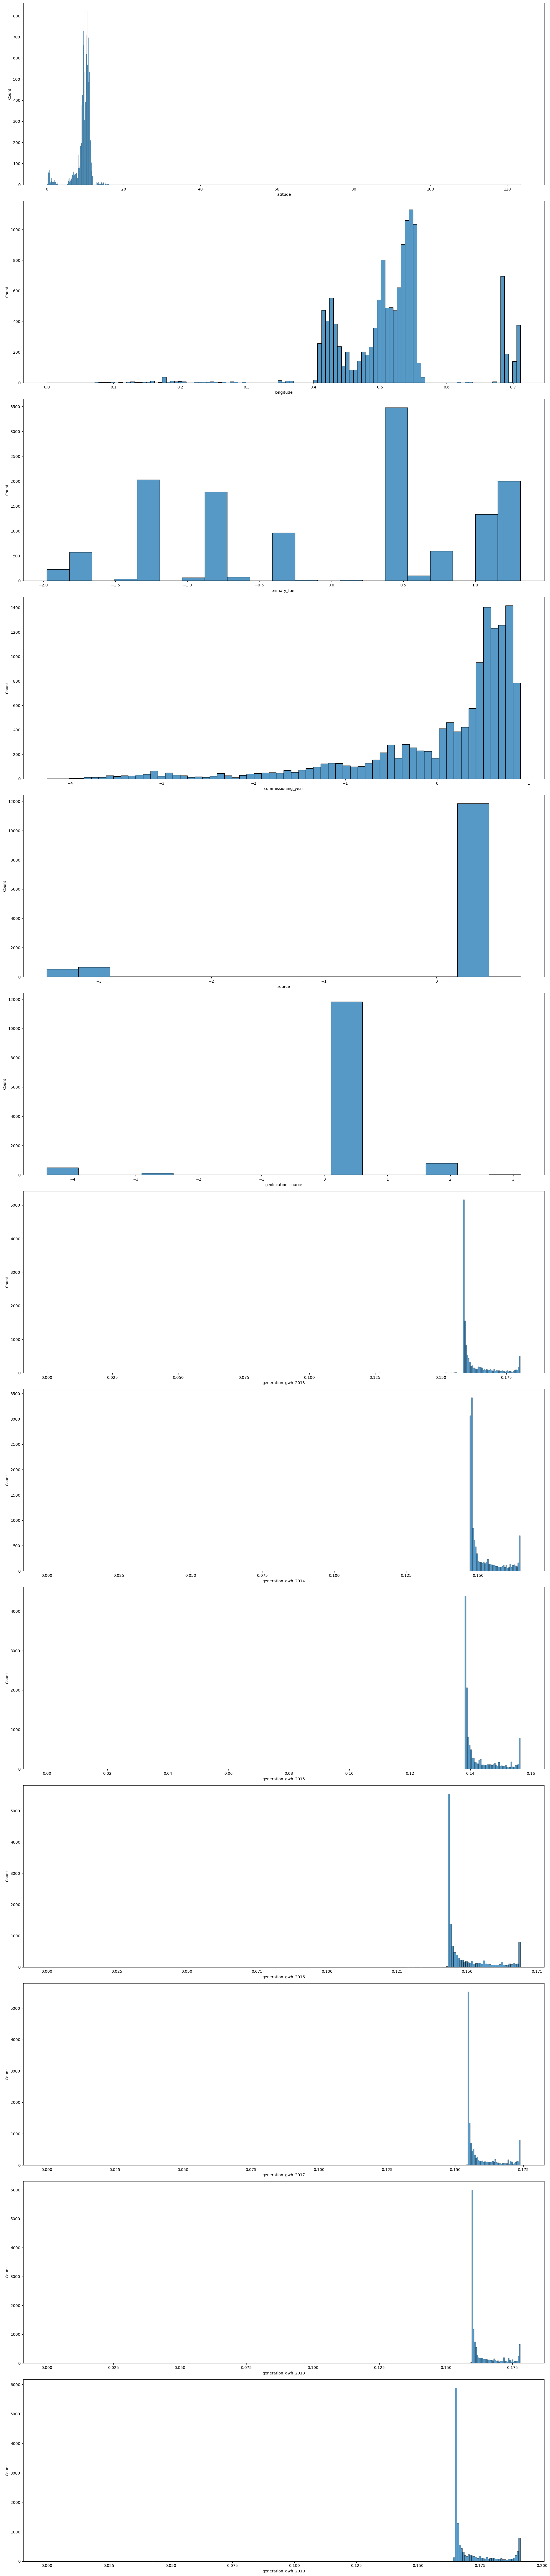

In [126]:
all_col_histplots(Xc_filled)

We need to check the amount of influence of outliers on our model before training it

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['values'] = [variance_inflation_factor(Xp_filled.values,i) for i in range(len(Xp_filled.columns))] 
vif['features'] = Xp_filled.columns

vif

,values,features
0,1.357445,capacity_mw
1,48.102349,latitude
2,75.433075,longitude
3,1.026046,commissioning_year
4,3.034633,source
5,1.577722,geolocation_source
6,1917.075067,generation_gwh_2013
7,8205.436731,generation_gwh_2014
8,8985.406111,generation_gwh_2015
9,3280.566962,generation_gwh_2016


In [160]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['values'] = [variance_inflation_factor(Xc_filled.values,i) for i in range(len(Xc_filled.columns))] 
vif['features'] = Xc_filled.columns

vif

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,values,features
0,inf,country
1,inf,country_long
2,1.111052,name
3,3.504775,gppd_idnr
4,51.202706,latitude
5,80.231958,longitude
6,1.792989,primary_fuel
7,1.353320,other_fuel1
8,1.332598,other_fuel2
9,1.236787,other_fuel3


We can see that there's a lot of influence. The values of VIF are too high

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

yp.value_counts()

primary_fuel
10    3480
3     2031
14    2004
5     1783
13    1340
7      961
12     595
1      572
0      230
11     104
6       72
4       65
2       34
8       16
9       11
Name: count, dtype: int64

In [161]:
yc.value_counts()

capacity_mw
0.0      2030
5.0       552
1.0       534
2.0       479
1.5       267
         ... 
772.0       1
119.1       1
251.8       1
153.9       1
596.7       1
Name: count, Length: 2304, dtype: int64

Since there are inequal number of categorical count, we use smote to upsample data. But we don't need that step for yc since it's a continuous variable

In [94]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
Xp_filled,yp = smote.fit_resample(Xp_filled,yp)

In [41]:
yp.value_counts()

primary_fuel
10    3480
13    3480
7     3480
1     3480
3     3480
5     3480
12    3480
0     3480
6     3480
14    3480
11    3480
2     3480
4     3480
9     3480
8     3480
Name: count, dtype: int64

# Training and testing data for Primary fuel type

In [141]:
X_train, X_test, y_train, y_test = train_test_split(Xp_filled, yp, test_size=0.2, random_state=42)



previous steps tells us there is a lot of impact of outliers. To handle outliers we use PCA technique in next steps before training

In [52]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X is your feature set and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(Xp_filled, yp, test_size=0.2, random_state=42)

accuracies = {}
for i in range(2,20):
    # Define the pipeline
    pipe = Pipeline([
        ('pca', PCA(n_components=i)),  # Adjust number of components as needed
        ('log_reg', LogisticRegression())
    ])

    # Fit the pipeline to the training data
    pipe.fit(X_train, y_train)

    # Predicting the target variable for test data
    predictions = pipe.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)
    
    print(f"Model Accuracy: {accuracy} for n_components {i}")
    accuracies[i] = accuracy


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.24588122605363985 for n_components 2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.2590038314176245 for n_components 3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.3348659003831418 for n_components 4


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.3527777777777778 for n_components 5


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.3810344827586207 for n_components 6


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.3823754789272031 for n_components 7


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.38122605363984674 for n_components 8


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.38409961685823757 for n_components 9


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.3815134099616858 for n_components 10


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.38275862068965516 for n_components 11


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.382088122605364 for n_components 12


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.38084291187739466 for n_components 13


ValueError: n_components=14 must be between 0 and min(n_samples, n_features)=13 with svd_solver='full'

In [46]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X is your feature set and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(Xp_filled, yp, test_size=0.2, random_state=42)

accuracies = {}
for i in range(2,12):
    # Define the pipeline\
    for j in range(5,10):
        pipe = Pipeline([
            ('pca', PCA(n_components=i)),  # Adjust number of components as needed
            ('log_reg', KNeighborsClassifier(n_neighbors=j))
        ])

        # Fit the pipeline to the training data
        pipe.fit(X_train, y_train)

        # Predicting the target variable for test data
        predictions = pipe.predict(X_test)

        # Calculate the accuracy of the model
        accuracy = accuracy_score(y_test, predictions)

        print(f"Model Accuracy: {accuracy} for n_components {i}")
        accuracies[str(f"{i}_{j}")] = accuracy
print(accuracies)

Model Accuracy: 0.5935823754789272 for n_components 2
Model Accuracy: 0.5862068965517241 for n_components 2
Model Accuracy: 0.5843869731800766 for n_components 2
Model Accuracy: 0.5794061302681992 for n_components 2
Model Accuracy: 0.5776819923371648 for n_components 2
Model Accuracy: 0.7849616858237548 for n_components 3
Model Accuracy: 0.775191570881226 for n_components 3
Model Accuracy: 0.7648467432950191 for n_components 3
Model Accuracy: 0.7583333333333333 for n_components 3
Model Accuracy: 0.7528735632183908 for n_components 3
Model Accuracy: 0.7934865900383141 for n_components 4
Model Accuracy: 0.7807471264367816 for n_components 4
Model Accuracy: 0.7727011494252873 for n_components 4
Model Accuracy: 0.764176245210728 for n_components 4
Model Accuracy: 0.7590038314176245 for n_components 4
Model Accuracy: 0.7924329501915709 for n_components 5
Model Accuracy: 0.7808429118773946 for n_components 5
Model Accuracy: 0.7727011494252873 for n_components 5
Model Accuracy: 0.764559386973

In [47]:
Keymax = max(zip(accuracies.values(), accuracies.keys()))[1]
print(Keymax)


8_5


The KNN performed really well and the best is at 8 and 11 PCA components and 5 neighbours

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

gnb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(Xp_filled, yp, test_size=0.2, random_state=42)

accuracies = {}
for i in range(2,12):
    # Define the pipeline\
    pipe = Pipeline([
        ('pca', PCA(n_components=i)),  # Adjust number of components as needed
        ('log_reg', GaussianNB())
    ])

    # Fit the pipeline to the training data
    pipe.fit(X_train, y_train)

    # Predicting the target variable for test data
    predictions = pipe.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)

    print(f"Model Accuracy: {accuracy} for n_components {i}")
    accuracies[i] = accuracy
print(accuracies)
Keymax = max(zip(accuracies.values(), accuracies.keys()))[1]
print(Keymax)

Model Accuracy: 0.22768199233716474 for n_components 2
Model Accuracy: 0.278544061302682 for n_components 3
Model Accuracy: 0.28735632183908044 for n_components 4
Model Accuracy: 0.29932950191570884 for n_components 5
Model Accuracy: 0.3544061302681992 for n_components 6
Model Accuracy: 0.3657088122605364 for n_components 7
Model Accuracy: 0.37787356321839083 for n_components 8
Model Accuracy: 0.39090038314176245 for n_components 9
Model Accuracy: 0.4061302681992337 for n_components 10
Model Accuracy: 0.42021072796934866 for n_components 11
{2: 0.22768199233716474, 3: 0.278544061302682, 4: 0.28735632183908044, 5: 0.29932950191570884, 6: 0.3544061302681992, 7: 0.3657088122605364, 8: 0.37787356321839083, 9: 0.39090038314176245, 10: 0.4061302681992337, 11: 0.42021072796934866}
11


Above algorithm performed best at ll PCA components

In [50]:
from sklearn.ensemble import RandomForestClassifier

for i in range(2,12):
    # Define the pipeline\
    pipe = Pipeline([
        ('pca', PCA(n_components=i)),  # Adjust number of components as needed
        ('log_reg', RandomForestClassifier())
    ])

    # Fit the pipeline to the training data
    pipe.fit(X_train, y_train)

    # Predicting the target variable for test data
    predictions = pipe.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)

    print(f"Model Accuracy: {accuracy} for n_components {i}")
    accuracies[i] = accuracy
print(accuracies)
Keymax = max(zip(accuracies.values(), accuracies.keys()))[1]
print(Keymax)

Model Accuracy: 0.6419540229885058 for n_components 2
Model Accuracy: 0.8590996168582375 for n_components 3
Model Accuracy: 0.8599616858237548 for n_components 4
Model Accuracy: 0.867624521072797 for n_components 5
Model Accuracy: 0.9082375478927203 for n_components 6
Model Accuracy: 0.9258620689655173 for n_components 7
Model Accuracy: 0.9316091954022988 for n_components 8
Model Accuracy: 0.9339080459770115 for n_components 9
Model Accuracy: 0.935823754789272 for n_components 10
Model Accuracy: 0.938984674329502 for n_components 11
{2: 0.6419540229885058, 3: 0.8590996168582375, 4: 0.8599616858237548, 5: 0.867624521072797, 6: 0.9082375478927203, 7: 0.9258620689655173, 8: 0.9316091954022988, 9: 0.9339080459770115, 10: 0.935823754789272, 11: 0.938984674329502}
11


In Random forests as well we get the same result. Hence we can assume that accuracy is directly proportional to the number of PCA components. So we keep that at 11. And We finalize random forest algorithm since it got great results

# Training and testing for capacity mega watts 

In [162]:
Xc_x = Xc_filled.drop(columns=[col for col in Xc_filled.columns if 'generation' in col])

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xc_filled, yc, test_size=0.2, random_state=42)

Let's use cross_val_score so that we can have a good validation for this regression model

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

for i in range(2,13):
# Define the pipeline\
    pipe = Pipeline([
        ('pca', PCA(n_components=i)),  # Adjust number of components as needed
        ('log_reg', LinearRegression())
    ])

    # Fit the pipeline to the training data
    pipe.fit(X_train, y_train)

    scores = cross_val_score(pipe, X_train, y_train, cv=5)

    print(f'for {i} we got : {scores}')

for 2 we got : [0.0844066  0.09915202 0.08712019 0.10650173 0.09318366]
for 3 we got : [0.10587181 0.12096378 0.11001333 0.14683169 0.11584474]
for 4 we got : [0.12743539 0.1559227  0.13779496 0.16984908 0.14939251]
for 5 we got : [0.12833634 0.15829627 0.13984093 0.17059615 0.14937238]
for 6 we got : [0.12773436 0.15986465 0.14188687 0.17214229 0.14958074]
for 7 we got : [0.34410401 0.29494327 0.36525723 0.39910367 0.34602528]
for 8 we got : [0.34817337 0.30056006 0.38142523 0.41629161 0.36681583]
for 9 we got : [0.34765045 0.30122038 0.38169577 0.41681224 0.36743212]
for 10 we got : [0.3498416  0.30272088 0.38336928 0.41491674 0.36696908]
for 11 we got : [0.34917826 0.30589044 0.38087497 0.41646359 0.36085478]
for 12 we got : [0.34910305 0.30575982 0.38051746 0.41629612 0.36103067]


without dropping columns

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

for i in range(2,13):
# Define the pipeline\
    pipe = Pipeline([
        ('pca', PCA(n_components=i)),  # Adjust number of components as needed
        ('log_reg', LinearRegression())
    ])

    # Fit the pipeline to the training data
    pipe.fit(X_train, y_train)

    scores = cross_val_score(pipe, X_train, y_train, cv=5)

    print(f'for {i} we got : {scores}')

for 2 we got : [0.10153436 0.13107691 0.12800041 0.12309571 0.11166759]
for 3 we got : [0.10072446 0.13515088 0.12770422 0.12644977 0.11204132]
for 4 we got : [0.11776645 0.14009531 0.1399373  0.14465787 0.124448  ]
for 5 we got : [0.1212477  0.14171251 0.14280078 0.15062333 0.12942704]
for 6 we got : [0.14762521 0.1622229  0.17425139 0.18851192 0.15437826]
for 7 we got : [0.15267968 0.17164283 0.18227095 0.19137098 0.16292502]
for 8 we got : [0.15238742 0.17066113 0.18232145 0.19169816 0.1629325 ]
for 9 we got : [0.15384304 0.17126909 0.18149226 0.19186774 0.1609924 ]
for 10 we got : [0.15844765 0.18408847 0.18852955 0.20550561 0.16890816]
for 11 we got : [0.15999749 0.18421081 0.18826956 0.20462563 0.16901572]
for 12 we got : [0.16331471 0.19284696 0.1942312  0.21218213 0.17848534]


Performance is bad

In [109]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

for i in range(2,13):
# Define the pipeline\
    pipe = Pipeline([
        ('pca', PCA(n_components=i)),  # Adjust number of components as needed
        ('log_reg', SVR())
    ])

    # Fit the pipeline to the training data
    pipe.fit(X_train, y_train)

    scores = cross_val_score(pipe, X_train, y_train, cv=5)

    print(f'for {i} we got : {scores}')

for 2 we got : [-0.03129932 -0.04472348 -0.02691327 -0.02678804 -0.03775837]
for 3 we got : [-0.03129976 -0.04515824 -0.0268831  -0.02676335 -0.03727517]
for 4 we got : [-0.02216928 -0.03560515 -0.01533652 -0.01668869 -0.02792036]
for 5 we got : [-0.02139875 -0.03470144 -0.01391209 -0.0148604  -0.02704751]
for 6 we got : [-0.02140777 -0.03466709 -0.01394114 -0.01486591 -0.02702046]
for 7 we got : [-0.02117948 -0.03442977 -0.01368878 -0.01466366 -0.02683619]
for 8 we got : [-0.02118101 -0.03442482 -0.0136818  -0.01465563 -0.02683466]
for 9 we got : [-0.02118096 -0.03442589 -0.01368188 -0.01465497 -0.02683561]
for 10 we got : [-0.0211808  -0.03442415 -0.01368161 -0.01465544 -0.02683633]
for 11 we got : [-0.02118081 -0.03442451 -0.01368197 -0.01465658 -0.02683596]
for 12 we got : [-0.02118089 -0.03442428 -0.01368165 -0.0146559  -0.02683631]


IT IS TOO SLOW. Also performance is bad for this model

In [111]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

for i in range(2,14):
# Define the pipeline\
    pipe = Pipeline([
        ('pca', PCA(n_components=i)),  # Adjust number of components as needed
        ('log_reg', GradientBoostingRegressor())
    ])

    # Fit the pipeline to the training data
    pipe.fit(X_train, y_train)

    scores = cross_val_score(pipe, X_train, y_train, cv=5)

    print(f'for {i} we got : {scores}')

for 2 we got : [0.14867948 0.19606922 0.15499343 0.20854329 0.19107419]
for 3 we got : [0.21571841 0.28247102 0.23081532 0.28542338 0.21982895]
for 4 we got : [0.2213088  0.29931939 0.21956966 0.30220994 0.23496845]
for 5 we got : [0.21508982 0.29343319 0.25010164 0.31307469 0.2628856 ]
for 6 we got : [0.24272507 0.32051067 0.27546027 0.30879959 0.29127959]
for 7 we got : [0.57665504 0.59694812 0.51975105 0.55133335 0.5016707 ]
for 8 we got : [0.5954835  0.60237278 0.5597262  0.59395084 0.56222056]
for 9 we got : [0.60483937 0.60032544 0.57819021 0.59642572 0.57451945]
for 10 we got : [0.60324774 0.60601273 0.58933362 0.59912366 0.57606066]
for 11 we got : [0.61768626 0.62357591 0.58270132 0.59951023 0.57800433]
for 12 we got : [0.61331154 0.62196968 0.57723338 0.60731232 0.56851619]


In [153]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

for lr in [0.05, 0.1,0.15,0.2]:
    pipe = Pipeline([
        ('pca', PCA(n_components=13)),  # Adjust number of components as needed
        ('log_reg', GradientBoostingRegressor(learning_rate=lr))
    ])

    # Fit the pipeline to the training data
    pipe.fit(X_train, y_train)

    scores = cross_val_score(pipe, X_train, y_train, cv=5)

    print(f'for {lr} we got : {scores}')

for 0.05 we got : [0.58056009 0.59233611 0.56961357 0.61895436 0.55891903]
for 0.1 we got : [0.60337062 0.6046677  0.57385337 0.63194092 0.57663545]
for 0.15 we got : [0.6103028  0.62758979 0.5787105  0.61747824 0.57040811]
for 0.2 we got : [0.61077332 0.64670814 0.58900553 0.61185006 0.57913308]


Without dropping columns as df

In [171]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

for lr in [0.05, 0.1,0.15,0.2]:
    pipe = Pipeline([
        ('pca', PCA(n_components=23)),  # Adjust number of components as needed
        ('log_reg', GradientBoostingRegressor(learning_rate=lr))
    ])

    # Fit the pipeline to the training data
    pipe.fit(X_train, y_train)

    scores = cross_val_score(pipe, X_train, y_train, cv=5)

    print(f'for {lr} we got : {scores}')

for 0.05 we got : [0.60168343 0.60130169 0.687128   0.67810631 0.5195009 ]
for 0.1 we got : [0.6305936  0.61299794 0.71162072 0.67773673 0.5058262 ]
for 0.15 we got : [0.6417835  0.59543905 0.70605931 0.67400638 0.4916401 ]
for 0.2 we got : [0.65534627 0.60326888 0.70325525 0.67342776 0.53707833]


In [156]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

for lr in [0.3]:
    pipe = Pipeline([
        ('pca', PCA(n_components=13)),  # Adjust number of components as needed
        ('log_reg', GradientBoostingRegressor(learning_rate=lr))
    ])

    # Fit the pipeline to the training data
    pipe.fit(X_train, y_train)

    scores = cross_val_score(pipe, X_train, y_train, cv=5)

    print(f'for {lr} we got : {scores}')

for 0.3 we got : [0.60869513 0.60237132 0.55406933 0.59718864 0.60659686]


In [152]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('pca', PCA(n_components=13)),  # Adjust number of components as needed
    ('log_reg', RandomForestRegressor(n_estimators=1000))
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

scores = cross_val_score(pipe, X_train, y_train, cv=5)

print(f'for {lr} we got : {scores}')

for 0.1 we got : [0.65346093 0.65969178 0.66951423 0.64031021 0.61204617]


# Without dropping columns

In [167]:
len(dfc.columns)

25

In [170]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('pca', PCA(n_components=24)),  # Adjust number of components as needed
    ('log_reg', RandomForestRegressor(n_estimators=1000))
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

scores = cross_val_score(pipe, X_train, y_train, cv=5)

print(scores)

array([0.66214658, 0.6461135 , 0.73753006, 0.7016167 , 0.55563292])

It's medium fast. But we have increased significant increase in score. We can take pca as 12 which is giving optimal prediction

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

# Define the pipeline steps
pipeline_steps = [
    ('pca', PCA(n_components=0.95)),  # Adjust n_components for your dataset
    ('regressor', GradientBoostingRegressor())
]

# Create the pipeline
pipeline = Pipeline(steps=pipeline_steps)

# Define the hyperparameters grid to search
param_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1],  # Regularization strength for Lasso and Ridge
    'regressor': [Lasso(), Ridge()]
}

# Set up the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data (X_train and y_train are your features and target variable)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", -grid_search.best_score_)


Best parameters found:  {'regressor': Ridge(alpha=1), 'regressor__alpha': 1}
Best cross-validation score:  102607.96190755753


Let's automate the process using grid search cv to get best model and best hyper parameters

In [150]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import joblib


pipeline_steps = [
    ('pca', PCA(n_components=13)),  # Adjust n_components as needed
    ('regressor', Lasso())  # Placeholder for the regressor
]


pipeline = Pipeline(steps=pipeline_steps)

param_grid = [
    {
        'regressor': [Lasso()],
        'regressor__alpha': [0.001, 0.01, 0.1, 1]  # Regularization strength for Lasso
    },
    {
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [100, 200]  # Number of trees for RandomForestRegressor
    },
    {
        'regressor': [GradientBoostingRegressor()],
        'regressor__learning_rate': [0.05, 0.1],  # Learning rate for GradientBoostingRegressor
        'regressor__n_estimators': [100, 200]
    }
]


# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its cross-validation score
best_model = grid_search.best_estimator_
best_score = -grid_search.best_score_

print("Best model: ", best_model)
print("Best cross-validation score: ", best_score)


Best model:  Pipeline(steps=[('pca', PCA(n_components=13)),
                ('regressor', RandomForestRegressor(n_estimators=200))])
Best cross-validation score:  42868.32794102473


Without dropping columns

In [173]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import joblib


pipeline_steps = [
    ('pca', PCA(n_components=13)),  # Adjust n_components as needed
    ('regressor', Lasso())  # Placeholder for the regressor
]


pipeline = Pipeline(steps=pipeline_steps)

param_grid = [
    {
        'regressor': [Lasso()],
        'regressor__alpha': [0.001, 0.01, 0.1, 1]  # Regularization strength for Lasso
    },
    {
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [100, 200]  # Number of trees for RandomForestRegressor
    },
    {
        'regressor': [GradientBoostingRegressor()],
        'regressor__learning_rate': [0.05, 0.1],  # Learning rate for GradientBoostingRegressor
        'regressor__n_estimators': [100, 200]
    }
]


# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its cross-validation score
best_model = grid_search.best_estimator_
best_score = -grid_search.best_score_

print("Best model: ", best_model)
print("Best cross-validation score: ", best_score)


Best model:  Pipeline(steps=[('pca', PCA(n_components=13)),
                ('regressor', RandomForestRegressor(n_estimators=200))])
Best cross-validation score:  -0.3558764581740969


Due to some reason we are not getting expected accuracy.